## Librairies importation

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Read DDQL logs

In [2]:
main_path = "/home/michael/git/ddql-abides/log/execution/marketreplay/marketreplay_ddqn_train_"
dates = [
    "2003-01-{:02d}".format(day) for day in (
        list(range(13, 18)) + list(range(21, 25)) + list(range(27, 32))
    )
] + [
    "2003-02-{:02d}".format(day) for day in list(range(3, 7))
]
# days = dates[:9]
days = dates[9:]

stats = {
    day: {
        file[:-4]: pd.read_pickle(os.path.join(
            main_path + "FINAL_train_IBM_{}_BUY_10_330_500000".format(day), file
        ), compression="bz2")
        for file in sorted(os.listdir(main_path + "FINAL_train_IBM_{}_BUY_10_330_500000".format(day)))
    } for day in days
}

2003-01-27


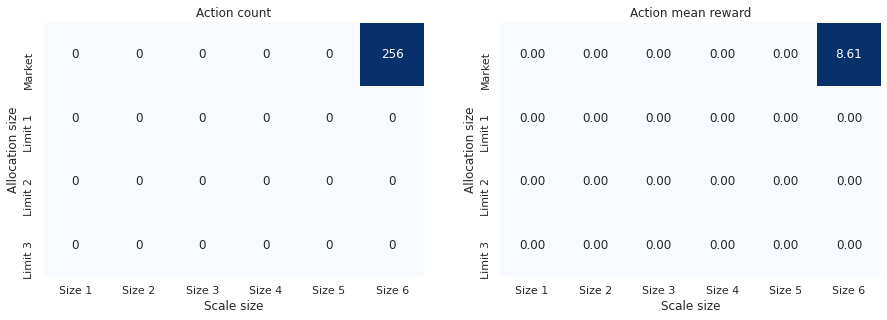

2003-01-28


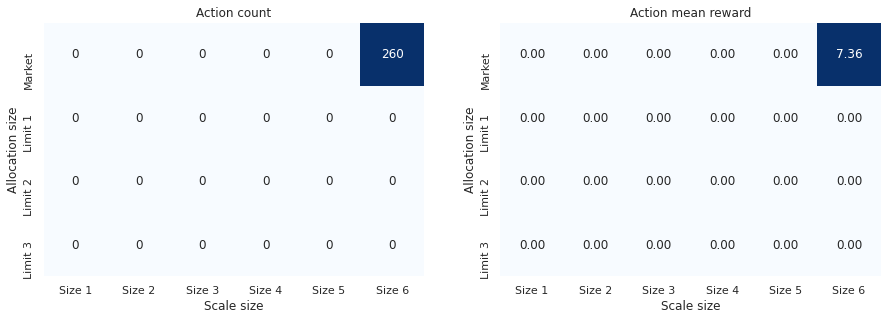

2003-01-29


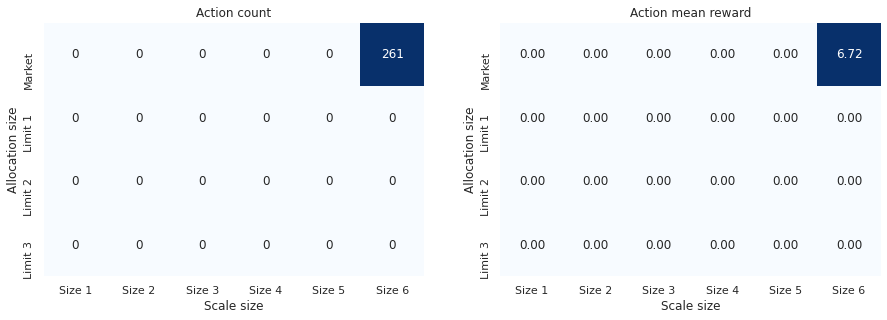

2003-01-30


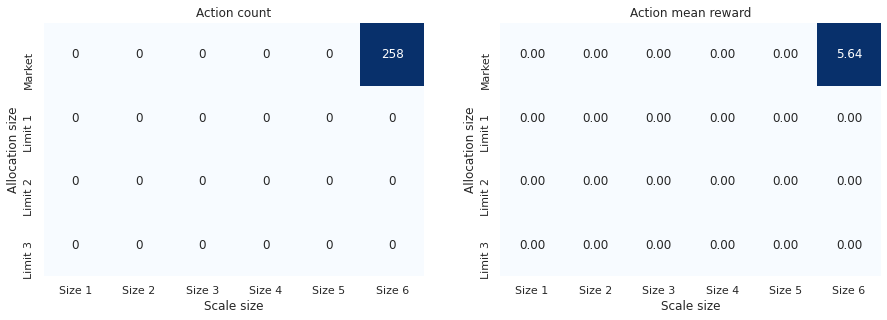

2003-01-31


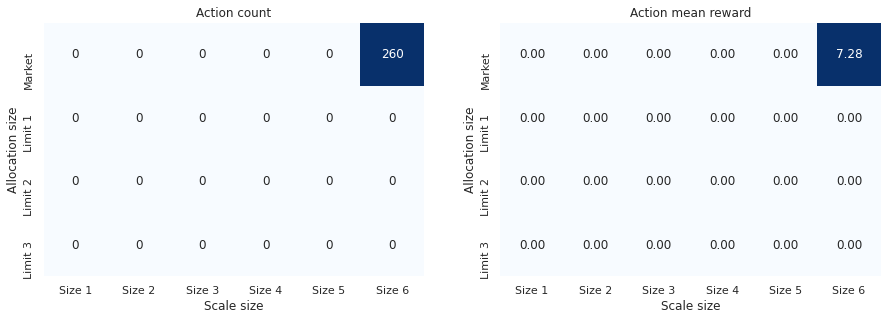

2003-02-03


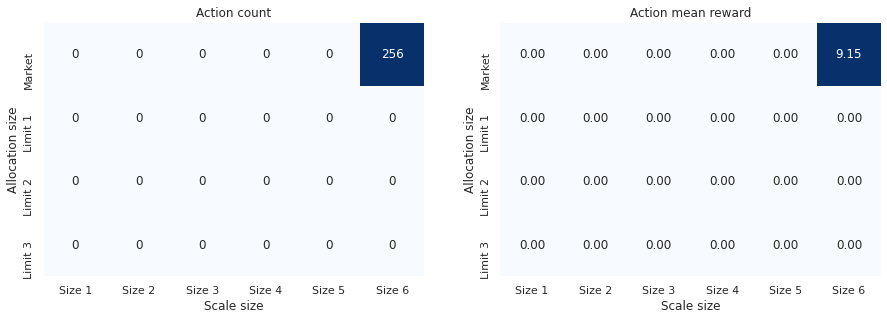

2003-02-04


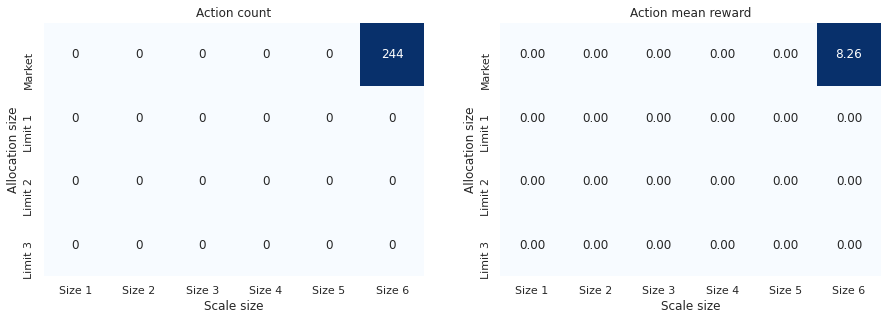

2003-02-05


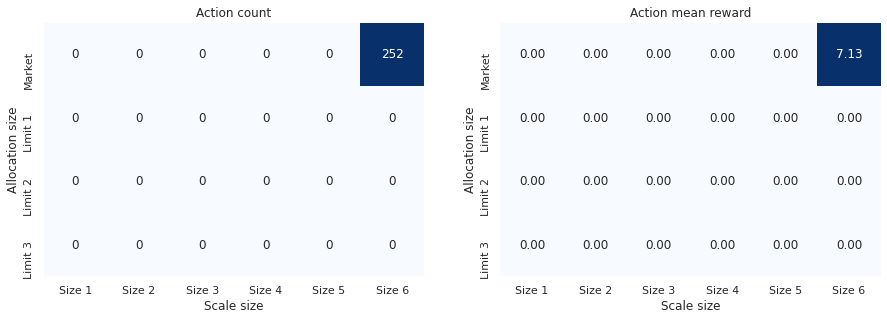

2003-02-06


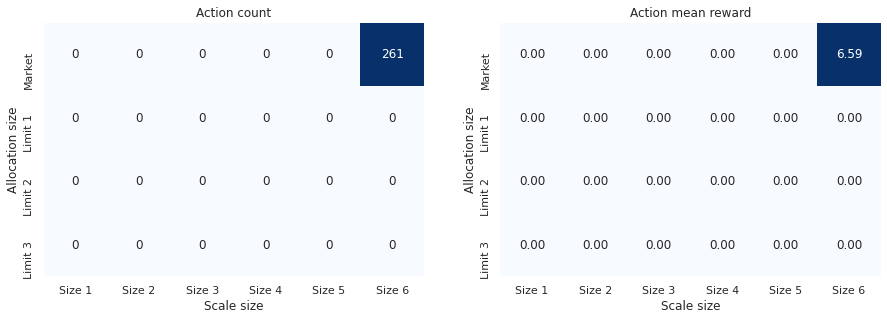

In [3]:
for day in days:
    nb_rows, nb_cols = 1, 2
    fig, ax = plt.subplots(figsize=(15, 5), nrows=nb_rows, ncols=nb_cols)
    print(day)
    for ind, (data, title, fmt) in enumerate([
        (stats[day]["agent_experience"][["a", "r"]].groupby(["a"])["r"].apply(lambda x: len(set(x))), "Action count", ".0f"),
        (stats[day]["agent_experience"][["a", "r"]].groupby(["a"])["r"].apply(np.mean), "Action mean reward", ".2f")
    ]):
        for action in range(24):
            if action not in data.index:
                data[action] = 0
        data = data.sort_index()
        data = data.values.reshape(4, 6)
        sns.heatmap(
            data,
            square=True, annot=True, cmap=plt.cm.Blues, fmt=fmt, ax=ax[ind],
            yticklabels=["Market", "Limit 1", "Limit 2", "Limit 3"],
            xticklabels=["Size {}".format(i) for i in range(1, 7)],
            cbar=False
        )
        ax[ind].set_title(title)
        ax[ind].set_xlabel("Scale size")
        ax[ind].set_ylabel("Allocation size")
    plt.show()

In [4]:
twap = []
ddqn = []
twap_avg = []
ddqn_avg = []
for day in days:
    print(day)
    display(stats[day]['summary_log'][
        (stats[day]['summary_log']["EventType"].isin(["FINAL_CASH_POSITION", "TOTAL_QTY", "REM_QTY", "AVG_TXN_PRICE"])) &
        (stats[day]['summary_log']["AgentStrategy"].isin(["TWAPExecutionAgent", "DDQExecutionAgent"]))
    ])
    twap.append(stats[day]['summary_log']["Event"][26] / stats[day]['summary_log']["Event"][29])
    ddqn.append(stats[day]['summary_log']["Event"][34] / (stats[day]['summary_log']["Event"][37] - stats[day]['summary_log']["Event"][38]))
    twap_avg.append(stats[day]['summary_log']["Event"][32])
    ddqn_avg.append(stats[day]['summary_log']["Event"][40])
    print("TWAP: ", stats[day]['summary_log']["Event"][26] / stats[day]['summary_log']["Event"][29])
    print("DDQN: ", stats[day]['summary_log']["Event"][34] / (stats[day]['summary_log']["Event"][37] - stats[day]['summary_log']["Event"][38]))

2003-01-27


,AgentID,AgentStrategy,Event,EventType
26,9,TWAPExecutionAgent,-3.91927e+07,FINAL_CASH_POSITION
29,9,TWAPExecutionAgent,500000,TOTAL_QTY
30,9,TWAPExecutionAgent,0,REM_QTY
32,9,TWAPExecutionAgent,78.39,AVG_TXN_PRICE
34,10,DDQExecutionAgent,-3.95228e+07,FINAL_CASH_POSITION
37,10,DDQExecutionAgent,500000,TOTAL_QTY
38,10,DDQExecutionAgent,-1380,REM_QTY
40,10,DDQExecutionAgent,78.83,AVG_TXN_PRICE


TWAP:  -78.38530302800017
DDQN:  -78.82810054649178
2003-01-28


,AgentID,AgentStrategy,Event,EventType
26,9,TWAPExecutionAgent,-3.97712e+07,FINAL_CASH_POSITION
29,9,TWAPExecutionAgent,500000,TOTAL_QTY
30,9,TWAPExecutionAgent,0,REM_QTY
32,9,TWAPExecutionAgent,79.54,AVG_TXN_PRICE
34,10,DDQExecutionAgent,-3.96553e+07,FINAL_CASH_POSITION
37,10,DDQExecutionAgent,500000,TOTAL_QTY
38,10,DDQExecutionAgent,-1380,REM_QTY
40,10,DDQExecutionAgent,79.09,AVG_TXN_PRICE


TWAP:  -79.54233901999962
DDQN:  -79.09234428178212
2003-01-29


,AgentID,AgentStrategy,Event,EventType
26,9,TWAPExecutionAgent,-3.98529e+07,FINAL_CASH_POSITION
29,9,TWAPExecutionAgent,500000,TOTAL_QTY
30,9,TWAPExecutionAgent,0,REM_QTY
32,9,TWAPExecutionAgent,79.71,AVG_TXN_PRICE
34,10,DDQExecutionAgent,-3.96079e+07,FINAL_CASH_POSITION
37,10,DDQExecutionAgent,500000,TOTAL_QTY
38,10,DDQExecutionAgent,-1380,REM_QTY
40,10,DDQExecutionAgent,79,AVG_TXN_PRICE


TWAP:  -79.70584457200013
DDQN:  -78.99772384419022
2003-01-30


,AgentID,AgentStrategy,Event,EventType
26,9,TWAPExecutionAgent,-3.97778e+07,FINAL_CASH_POSITION
29,9,TWAPExecutionAgent,500000,TOTAL_QTY
30,9,TWAPExecutionAgent,0,REM_QTY
32,9,TWAPExecutionAgent,79.56,AVG_TXN_PRICE
34,10,DDQExecutionAgent,-4.02062e+07,FINAL_CASH_POSITION
37,10,DDQExecutionAgent,500000,TOTAL_QTY
38,10,DDQExecutionAgent,-1380,REM_QTY
40,10,DDQExecutionAgent,80.19,AVG_TXN_PRICE


TWAP:  -79.55563879199993
DDQN:  -80.19098960070183
2003-01-31


,AgentID,AgentStrategy,Event,EventType
26,9,TWAPExecutionAgent,-3.89321e+07,FINAL_CASH_POSITION
29,9,TWAPExecutionAgent,500000,TOTAL_QTY
30,9,TWAPExecutionAgent,0,REM_QTY
32,9,TWAPExecutionAgent,77.86,AVG_TXN_PRICE
34,10,DDQExecutionAgent,-3.89485e+07,FINAL_CASH_POSITION
37,10,DDQExecutionAgent,500000,TOTAL_QTY
38,10,DDQExecutionAgent,-1380,REM_QTY
40,10,DDQExecutionAgent,77.68,AVG_TXN_PRICE


TWAP:  -77.86426944999975
DDQN:  -77.68261876421046
2003-02-03


,AgentID,AgentStrategy,Event,EventType
26,9,TWAPExecutionAgent,-3.90859e+07,FINAL_CASH_POSITION
29,9,TWAPExecutionAgent,500000,TOTAL_QTY
30,9,TWAPExecutionAgent,0,REM_QTY
32,9,TWAPExecutionAgent,78.17,AVG_TXN_PRICE
34,10,DDQExecutionAgent,-3.9224e+07,FINAL_CASH_POSITION
37,10,DDQExecutionAgent,500000,TOTAL_QTY
38,10,DDQExecutionAgent,-1380,REM_QTY
40,10,DDQExecutionAgent,78.23,AVG_TXN_PRICE


TWAP:  -78.171861154
DDQN:  -78.23203373489146
2003-02-04


,AgentID,AgentStrategy,Event,EventType
26,9,TWAPExecutionAgent,-3.82956e+07,FINAL_CASH_POSITION
29,9,TWAPExecutionAgent,500000,TOTAL_QTY
30,9,TWAPExecutionAgent,0,REM_QTY
32,9,TWAPExecutionAgent,76.59,AVG_TXN_PRICE
34,10,DDQExecutionAgent,-3.84127e+07,FINAL_CASH_POSITION
37,10,DDQExecutionAgent,500000,TOTAL_QTY
38,10,DDQExecutionAgent,-1380,REM_QTY
40,10,DDQExecutionAgent,76.61,AVG_TXN_PRICE


TWAP:  -76.59125614800013
DDQN:  -76.61386796042888
2003-02-05


,AgentID,AgentStrategy,Event,EventType
26,9,TWAPExecutionAgent,-3.90307e+07,FINAL_CASH_POSITION
29,9,TWAPExecutionAgent,500000,TOTAL_QTY
30,9,TWAPExecutionAgent,0,REM_QTY
32,9,TWAPExecutionAgent,78.06,AVG_TXN_PRICE
34,10,DDQExecutionAgent,-3.91472e+07,FINAL_CASH_POSITION
37,10,DDQExecutionAgent,500000,TOTAL_QTY
38,10,DDQExecutionAgent,-1380,REM_QTY
40,10,DDQExecutionAgent,78.08,AVG_TXN_PRICE


TWAP:  -78.06147180999973
DDQN:  -78.07893297698352
2003-02-06


,AgentID,AgentStrategy,Event,EventType
26,9,TWAPExecutionAgent,-3.86854e+07,FINAL_CASH_POSITION
29,9,TWAPExecutionAgent,500000,TOTAL_QTY
30,9,TWAPExecutionAgent,0,REM_QTY
32,9,TWAPExecutionAgent,77.37,AVG_TXN_PRICE
34,10,DDQExecutionAgent,-3.86952e+07,FINAL_CASH_POSITION
37,10,DDQExecutionAgent,500000,TOTAL_QTY
38,10,DDQExecutionAgent,-1380,REM_QTY
40,10,DDQExecutionAgent,77.18,AVG_TXN_PRICE


TWAP:  -77.3708360599998
DDQN:  -77.17748165263833


In [5]:
np.mean(twap)

-78.36098000377768

In [6]:
np.mean(ddqn)

-78.32156592914652

In [7]:
np.mean(twap_avg)

78.36111111111111

In [8]:
np.mean(ddqn_avg)

78.32111111111112

In [9]:
(np.mean(ddqn_avg) - np.mean(twap_avg)) / np.mean(twap_avg)

-0.0005104572846507314

In [10]:
(np.mean(ddqn) - np.mean(twap)) / np.mean(twap)

-0.000502980879377308

## Plot graphs

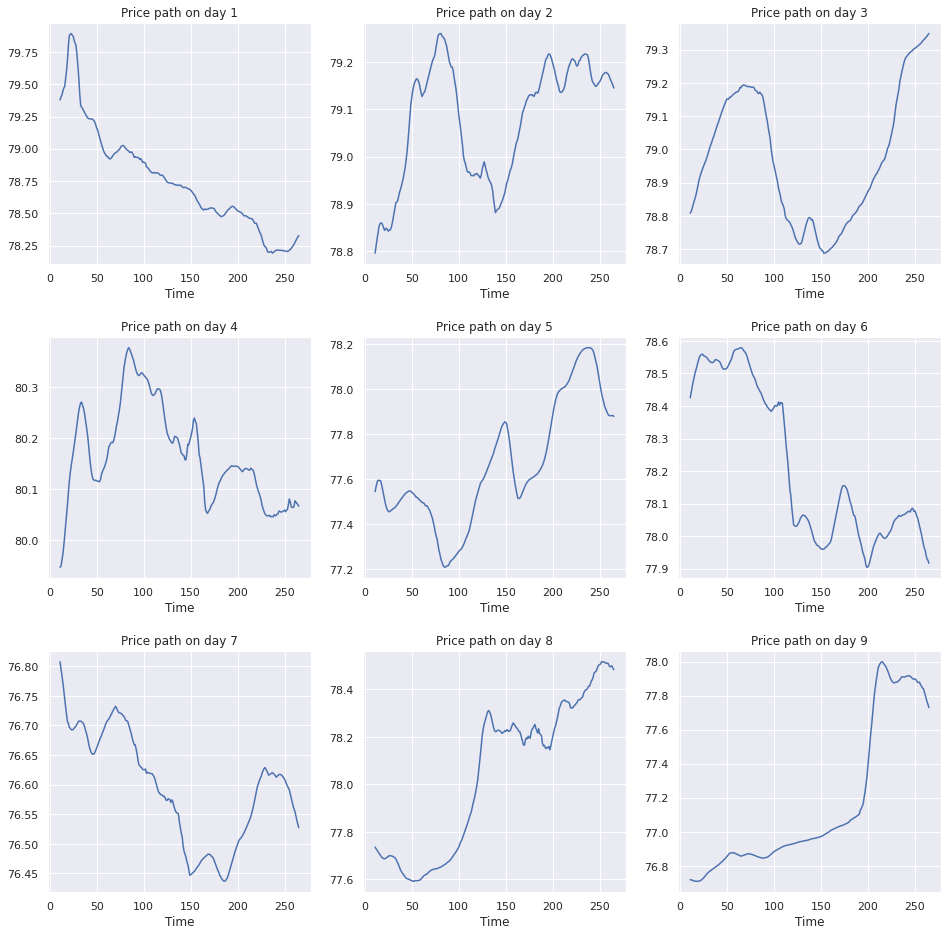

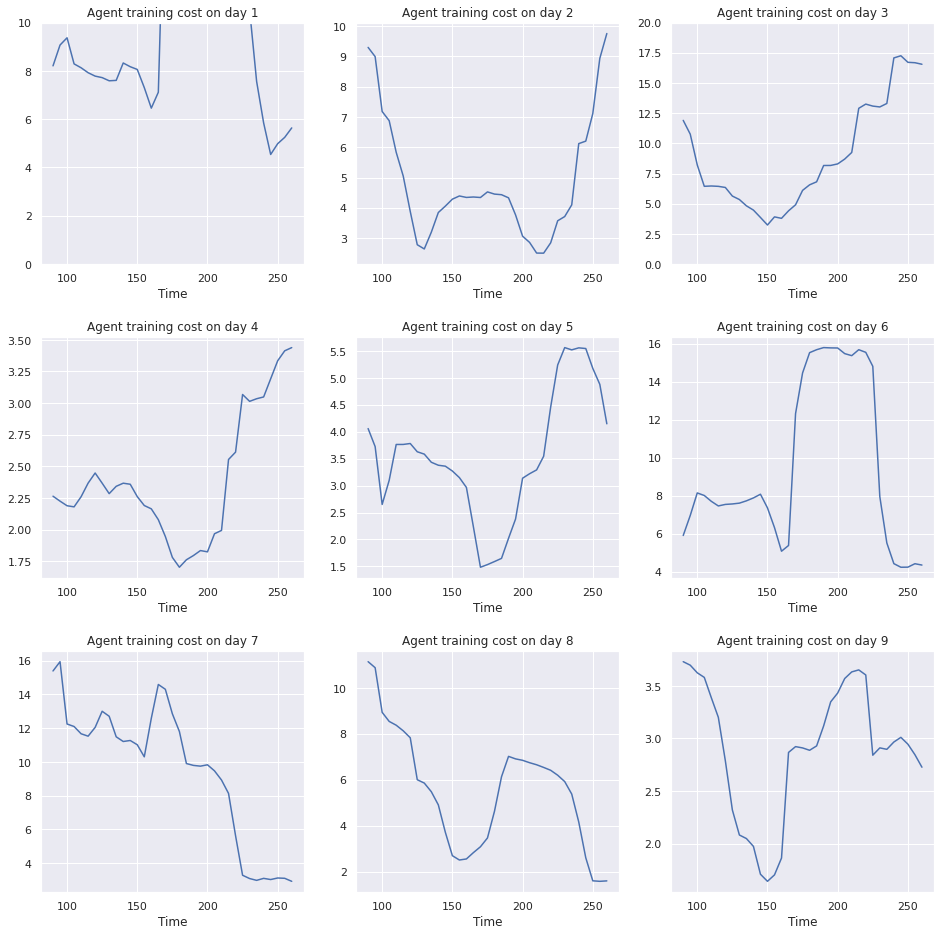

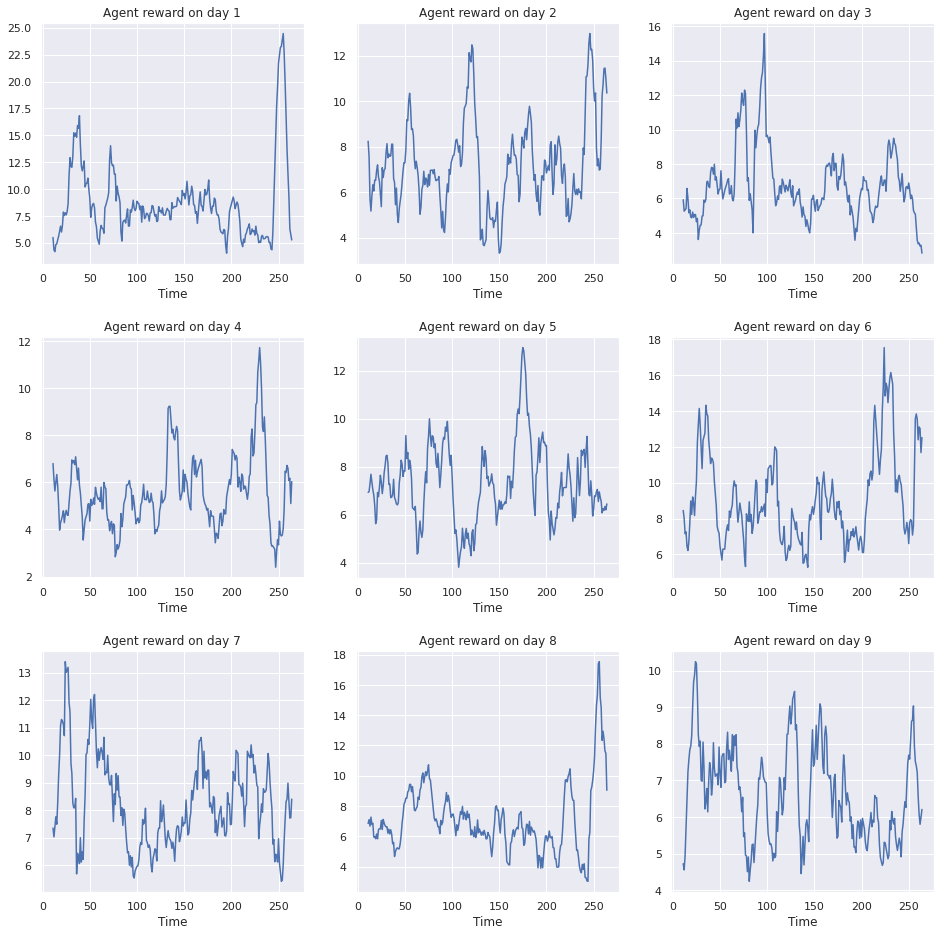

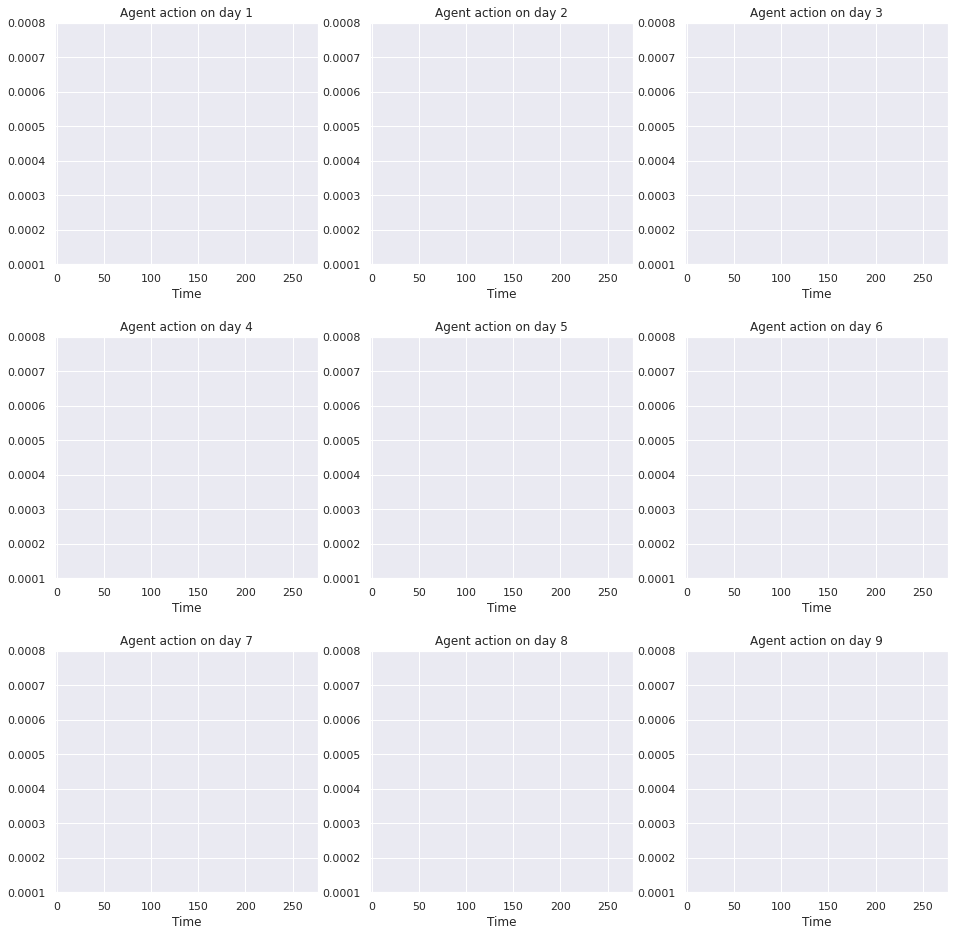

In [11]:
roll = 12
train = True

for key in ['agent_price_path', 'agent_cost_hist', 'agent_step_reward_hist', 'agent_action_hist']:
    fig, ax = plt.subplots(figsize=(16, 16), nrows=3, ncols=3)
    for ind, day in enumerate(days):
        ax[ind // 3, ind % 3].set_xlabel("Time")
        if key == 'agent_action_hist':
            ax[ind // 3, ind % 3].plot(stats[day][key].rolling(roll).mean())
            ax[ind // 3, ind % 3].set_ylim(0.0001, 0.0008)
            ax[ind // 3, ind % 3].set_title("Agent action on day {}".format(ind + 1))
        elif key == 'agent_cost_hist' and train:
            ax[ind // 3, ind % 3].plot(stats[day][key].rolling(roll).mean())
            ax[ind // 3, ind % 3].set_title("Agent training cost on day {}".format(ind + 1))
            if ind == 0:
                ax[ind // 3, ind % 3].set_ylim(0, 10)
            elif ind == 2:
                ax[ind // 3, ind % 3].set_ylim(0, 20)
        elif key != 'agent_cost_hist':
            ax[ind // 3, ind % 3].plot(stats[day][key].rolling(roll).mean())
            if key == 'agent_price_path':
                ax[ind // 3, ind % 3].set_title("Price path on day {}".format(ind + 1))
            else:
                ax[ind // 3, ind % 3].set_title("Agent reward on day {}".format(ind + 1))
    
    plt.subplots_adjust(hspace=0.3)
    plt.show()